<a href="https://colab.research.google.com/github/yjyjyjcho/Numble_credit-rating-project/blob/main/3%EC%A3%BC%EC%B0%A8_%EC%82%B0%EC%B6%9C%EB%AC%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path_macro_oil = '/content/drive/MyDrive/NUMBLE_2022_기업신용평가_2팀/주간 산출물/3주차/macro/원유+가격2022-08-18.csv' #두바이유
path_macro_rock = '/content/drive/MyDrive/NUMBLE_2022_기업신용평가_2팀/주간 산출물/3주차/macro/유연탄+가격2022-08-18.csv' #유연탄
path_macro_iron = '/content/drive/MyDrive/NUMBLE_2022_기업신용평가_2팀/주간 산출물/3주차/macro/철광석+가격2022-08-18.csv' #철광석
path_stock = '/content/drive/MyDrive/NUMBLE_2022_기업신용평가_2팀/주간 산출물/3주차/stock/stock_price_1M.csv'

In [36]:
oil = pd.read_csv(path_macro_oil)
rock = pd.read_csv(path_macro_rock)
iron = pd.read_csv(path_macro_iron)
stock = pd.read_csv(path_stock)

In [37]:
oil = oil[['date', 'price', 'delta', 'delta_ratio']]
rock = rock[['date', 'price', 'delta', 'delta_ratio']]
iron = iron[['date', 'price', 'delta', 'delta_ratio']]


In [49]:
# oil = oil.drop([156, 157, 158, 159, 160, 161, 162], axis = 0)
# oil = oil.drop([154, 155], axis = 0)
# iron = iron.drop([160, 161], axis = 0)

In [54]:
stock.columns

##시공사
# 'daewoo' = 대우건설
# 'hdc' = hdc

##건설기계
# 'hyundai_di' = 현대대우인프라코어

##시행사
# 'skd_d' = sk 디앤디

##가전제품
# 'haatz' = 하츠
# 'livart' = 리바트

Index(['date', 'daewoo', 'haatz', 'hdc', 'hyundai_di', 'livart', 'skd_d',
       'avg'],
      dtype='object')

##두바이유 EDA

In [65]:
oil.shape

(154, 4)

In [55]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 153
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         154 non-null    object 
 1   price        154 non-null    float64
 2   delta        154 non-null    float64
 3   delta_ratio  154 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.0+ KB


In [63]:
oil.describe()

,price,delta,delta_ratio
count,154.000000,154.000000,154.000000
mean,64.660260,0.277143,0.563961
std,21.917556,3.442355,6.893007
min,18.170000,-14.650000,-30.160000
25%,49.405000,-1.055000,-2.045000
50%,63.495000,0.275000,0.500000
75%,73.790000,2.087500,3.010000
max,118.940000,13.000000,42.650000


In [79]:
oil.isnull().sum()

date           0
price          0
delta          0
delta_ratio    0
dtype: int64

##유연탄 EDA

In [69]:
rock.shape

(160, 4)

In [70]:
rock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         160 non-null    object 
 1   price        160 non-null    float64
 2   delta        160 non-null    float64
 3   delta_ratio  160 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.2+ KB


In [71]:
rock.describe()

,price,delta,delta_ratio
count,160.000000,160.000000,160.000000
mean,94.405063,0.775938,0.805688
std,51.571901,9.396679,5.963034
min,44.000000,-30.200000,-15.640000
25%,59.975000,-0.702500,-0.822500
50%,69.510000,-0.010000,-0.015000
75%,126.775000,1.892500,2.110000
max,256.000000,83.900000,48.750000


In [80]:
rock.isnull().sum()

date           0
price          0
delta          0
delta_ratio    0
dtype: int64

##철광석 EDA

In [73]:
iron.shape

(160, 4)

In [74]:
iron.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         160 non-null    object 
 1   price        160 non-null    float64
 2   delta        160 non-null    float64
 3   delta_ratio  160 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.2+ KB


In [75]:
iron.describe()

,price,delta,delta_ratio
count,160.000000,160.000000,160.000000
mean,128.365312,0.053188,0.203750
std,37.058933,7.635172,5.533094
min,81.990000,-22.810000,-16.640000
25%,95.810000,-3.392500,-2.772500
50%,121.440000,0.635000,0.595000
75%,150.965000,5.107500,3.935000
max,226.460000,29.590000,15.030000


In [81]:
iron.isnull().sum()

date           0
price          0
delta          0
delta_ratio    0
dtype: int64

##주가 EDA

In [76]:
stock.shape

(34, 8)

In [77]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        34 non-null     object 
 1   daewoo      34 non-null     float64
 2   haatz       34 non-null     float64
 3   hdc         34 non-null     float64
 4   hyundai_di  34 non-null     float64
 5   livart      34 non-null     float64
 6   skd_d       34 non-null     float64
 7   avg         34 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.2+ KB


In [122]:
stock.describe()

,daewoo,haatz,hdc,hyundai_di,livart,skd_d,avg
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,5310.960434,8524.972710,23508.796220,7863.376631,15238.366374,33151.973183,15599.740925
std,1559.840512,2051.532919,5714.129075,2912.058919,2806.593588,6225.429493,2725.793422
min,2901.666667,4774.772727,12042.500000,3375.227273,7675.909091,24715.909090,9858.674242
25%,3859.567099,6787.261905,20346.907895,6152.500000,13936.309525,28814.166667,13721.764880
50%,5814.194444,8430.912699,23346.136365,6997.521645,15381.709960,30681.728775,15256.740810
75%,6512.706767,9911.578948,28565.314325,8630.463659,16970.643940,36946.650715,17604.970237
max,8637.727273,12538.636360,32992.105260,15206.818180,19965.909090,45507.142860,20554.318180


In [82]:
stock.isnull().sum()

date          0
daewoo        0
haatz         0
hdc           0
hyundai_di    0
livart        0
skd_d         0
avg           0
dtype: int64

##datetime 전처리


In [90]:
oil['date'] = pd.to_datetime(oil['date'])
rock['date'] = pd.to_datetime(rock['date'])
iron['date'] = pd.to_datetime(iron['date'])
stock['date'] = pd.to_datetime(stock['date'])


In [95]:
oil

,date,price,delta,delta_ratio
0,2019-06-07,61.20,-2.63,-4.12
1,2019-06-14,59.90,-1.30,-2.12
2,2019-06-21,64.22,4.32,7.21
3,2019-06-28,64.88,0.66,1.03
4,2019-07-05,61.62,-3.26,-5.02
...,...,...,...,...
149,2022-05-27,112.36,4.29,3.97
150,2022-06-03,112.12,-0.24,-0.21
151,2022-06-10,118.94,6.82,6.08
152,2022-06-17,116.29,-2.65,-2.23


##각 데이터별 시각화(스케일링 전)

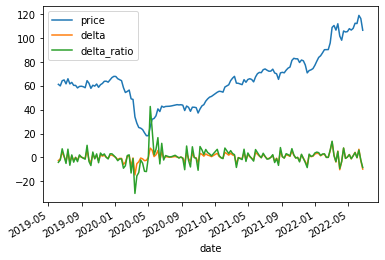

In [96]:
oil.plot(x='date')
plt.show()

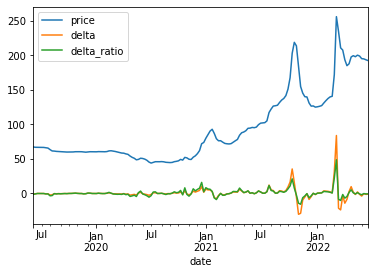

In [98]:
rock.plot(x='date')
plt.show()

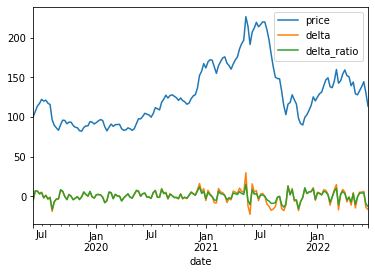

In [99]:
iron.plot(x='date')
plt.show()

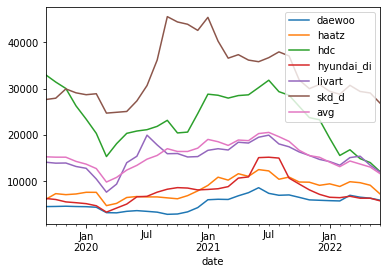

In [97]:
stock.plot(x='date')
plt.show()

In [114]:
# #oil 빈행 추가해서 차원 맞추기
# temp_df = pd.DataFrame(index=range(0,6), columns=oil.columns)
# temp_df

# oil_re = pd.concat([oil, temp_df], axis=0, ignore_index=True)
# oil_re

,date,price,delta,delta_ratio
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN


In [128]:
oil_re

,date,price,delta,delta_ratio
0,2019-06-07,61.20,-2.63,-4.12
1,2019-06-14,59.90,-1.30,-2.12
2,2019-06-21,64.22,4.32,7.21
3,2019-06-28,64.88,0.66,1.03
4,2019-07-05,61.62,-3.26,-5.02
...,...,...,...,...
155,NaT,NaN,NaN,NaN
156,NaT,NaN,NaN,NaN
157,NaT,NaN,NaN,NaN
158,NaT,NaN,NaN,NaN


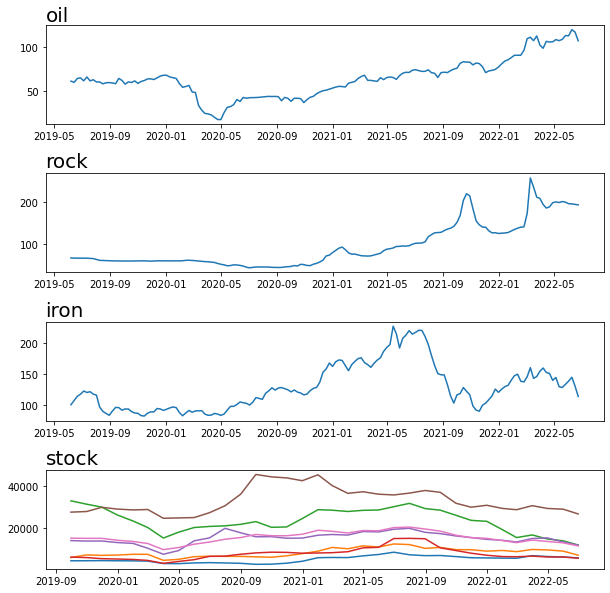

In [151]:
plt.figure(figsize=(10,10))

plt.subplots_adjust(hspace=0.5)

plt.subplot(4,1,1)
plt.title('oil', fontsize=20, loc='left', pad='-1')
plt.plot(oil_re['date'], oil_re['price'])

plt.subplot(4,1,2)
plt.title('rock', fontsize=20, loc='left')
plt.plot(rock['date'], rock['price'])

plt.subplot(4,1,3)
plt.title('iron', fontsize=20, loc='left')
plt.plot(iron['date'], iron['price'])

plt.subplot(4,1,4)
plt.title('stock', fontsize=20, loc='left')
plt.plot(stock['date'], stock[['daewoo','haatz', 'hdc', 'hyundai_di', 'livart', 'skd_d', 'avg']])

In [135]:
stock.columns

Index(['date', 'daewoo', 'haatz', 'hdc', 'hyundai_di', 'livart', 'skd_d',
       'avg'],
      dtype='object')

In [162]:
stock_name_li = list(stock.columns.values)

In [164]:
stock_name_li.remove('date')

In [165]:
stock_name_li

['daewoo', 'haatz', 'hdc', 'hyundai_di', 'livart', 'skd_d', 'avg']

##스케일링

In [172]:
#시계열 데이터는 회귀형 데이터이므로 MinMaxScaler로 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

temp_oil = oil_re[['price']]
oil_m_scaler = pd.DataFrame(scaler.fit_transform(temp_oil))
print(oil_m_scaler)

            0
0    0.427012
1    0.414111
2    0.456981
3    0.463531
4    0.431180
..        ...
155       NaN
156       NaN
157       NaN
158       NaN
159       NaN

[160 rows x 1 columns]


In [173]:
oil_re['price_m_scaler'] = oil_m_scaler

In [153]:
temp_rock = rock[['price']]
temp_iron = iron[['price']]
rock_m_scaler = pd.DataFrame(scaler.fit_transform(temp_rock))
iron_m_scaler = pd.DataFrame(scaler.fit_transform(temp_iron))

In [169]:
# for i in stock_name_li:
#   temp_stock = stock[[i]]
#   m_scaler = pd.DataFrame(scaler.fit_transform(temp_stock))
#   x = i+'_price_m_scaler'
#   i[x] = m_scaler

# stock

In [155]:
rock['price_m_scaler'] = rock_m_scaler
iron['price_m_scaler'] = iron_m_scaler

In [171]:
temp_daewoo = stock[['daewoo']]
temp_hdc = stock[['hdc']]
temp_hyundai_di = stock[['hyundai_di']]
temp_skd_d = stock[['skd_d']]
temp_haatz = stock[['haatz']]
temp_livart = stock[['livart']]
temp_avg = stock[['avg']]

stock['daewoo'] = pd.DataFrame(scaler.fit_transform(temp_daewoo))
stock['hdc'] = pd.DataFrame(scaler.fit_transform(temp_hdc))
stock['hyundai_di'] = pd.DataFrame(scaler.fit_transform(temp_hyundai_di))
stock['skd_d'] = pd.DataFrame(scaler.fit_transform(temp_skd_d))
stock['haatz'] = pd.DataFrame(scaler.fit_transform(temp_haatz))
stock['livart'] = pd.DataFrame(scaler.fit_transform(temp_livart))
stock['avg'] = pd.DataFrame(scaler.fit_transform(temp_avg))

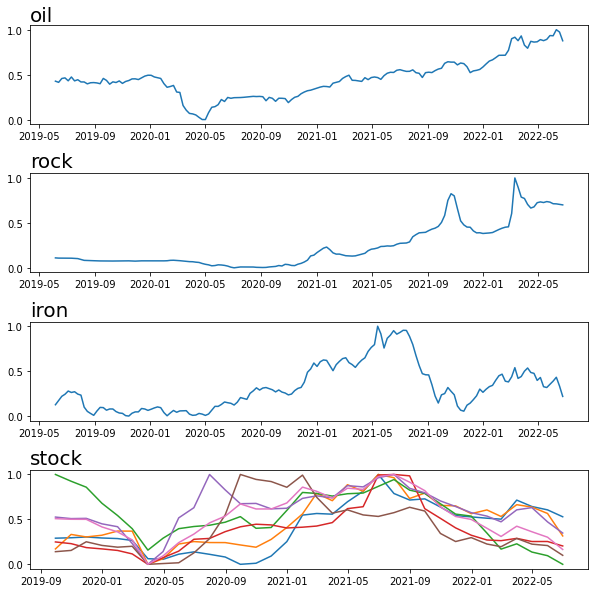

In [174]:
#스케일링된 값들 간의 plot

plt.figure(figsize=(10,10))

plt.subplots_adjust(hspace=0.5)

plt.subplot(4,1,1)
plt.title('oil', fontsize=20, loc='left', pad='-1')
plt.plot(oil_re['date'], oil_re['price_m_scaler'])

plt.subplot(4,1,2)
plt.title('rock', fontsize=20, loc='left')
plt.plot(rock['date'], rock['price_m_scaler'])

plt.subplot(4,1,3)
plt.title('iron', fontsize=20, loc='left')
plt.plot(iron['date'], iron['price_m_scaler'])

plt.subplot(4,1,4)
plt.title('stock', fontsize=20, loc='left')
plt.plot(stock['date'], stock[['daewoo','haatz', 'hdc', 'hyundai_di', 'livart', 'skd_d', 'avg']])

##상관분석

In [ ]:
'''
상관 분석을 통해 도출되는 상관 계수도 여러 종류가 있다. 대표적으로 아래 4가지 상관계수가 있다. 

피어슨 상관계수(Pearson Correlation Coefficient)
스피어만 상관계수(Spearman Correlation Coefficient)
켄달 타우(Kendalltau, Kendall Rank Correlation Coefficient)
크론바흐 알파 계수(Cronbach's alpha)
 

이 중 피어슨 상관계수(Pearson Correlation Coefficient)만 간략히 살펴본다.

 

피어슨 상관계수는 변수들 간 관련성을 구하는 이변량 상관분석(Bivariate Correlation Analysis)에서 주로 이용된다.
'''

In [ ]:
'''
결정계수(Coefficient of Determination)는 r2으로 계산하며 
이는 X로부터 Y를 예측할 수 있는 정도를 의미한다. 결정계수는 
추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도이다.

r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
 
출처: 위키피디아
'''

In [184]:
#피어슨 상관계수
print('################################################')
print('시공사 섹터')
print('유가 & 대우건설 피어슨 계수')
print(oil_re.corrwith(other=stock['daewoo'], method='pearson'))
print('\n')
print('유연탄 & 대우건설 피어슨 계수')
print(rock.corrwith(other=stock['daewoo'], method='pearson'))
print('\n')
print('철광석 & 대우건설 피어슨 계수')
print(iron.corrwith(other=stock['daewoo'], method='pearson'))
print('################################################\n')

print('유가 & 현산 피어슨 계수')
print(oil_re.corrwith(other=stock['hdc'], method='pearson'))
print('\n')
print('유연탄 & 현산 피어슨 계수')
print(rock.corrwith(other=stock['hdc'], method='pearson'))
print('\n')
print('철광석 & 현산 피어슨 계수')
print(iron.corrwith(other=stock['hdc'], method='pearson'))
print('################################################\n')
print('################################################\n')
print('건설기계 섹터')
print('유가 & 현대대우인프라코어 피어슨 계수')
print(oil_re.corrwith(other=stock['hyundai_di'], method='pearson'))
print('\n')
print('유연탄 & 현대대우인프라코어 피어슨 계수')
print(rock.corrwith(other=stock['hyundai_di'], method='pearson'))
print('\n')
print('철광석 & 현대대우인프라코어 피어슨 계수')
print(iron.corrwith(other=stock['hyundai_di'], method='pearson'))
print('################################################\n')
print('################################################\n')
print('시행사 섹터')
print('유가 & 에스케어디앤디 피어슨 계수')
print(oil_re.corrwith(other=stock['skd_d'], method='pearson'))
print('\n')
print('유연탄 & 에스케어디앤디 피어슨 계수')
print(rock.corrwith(other=stock['skd_d'], method='pearson'))
print('\n')
print('철광석 & 에스케어디앤디 피어슨 계수')
print(iron.corrwith(other=stock['skd_d'], method='pearson'))
print('################################################\n')
print('################################################\n')
print('가전제품 섹터')
print('유가 &  하츠 피어슨 계수')
print(oil_re.corrwith(other=stock['haatz'], method='pearson'))
print('\n')
print('유연탄 & 하츠 피어슨 계수')
print(rock.corrwith(other=stock['haatz'], method='pearson'))
print('\n')
print('철광석 & 하츠 피어슨 계수')
print(iron.corrwith(other=stock['haatz'], method='pearson'))
print('################################################\n')
print('유가 & 리바트 피어슨 계수')
print(oil_re.corrwith(other=stock['livart'], method='pearson'))
print('\n')
print('유연탄 & 리바트 피어슨 계수')
print(rock.corrwith(other=stock['livart'], method='pearson'))
print('\n')
print('철광석 & 리바트 피어슨 계수')
print(iron.corrwith(other=stock['livart'], method='pearson'))
print('################################################\n')

print('전체 평균주가')
print('유가 & avg 피어슨 계수')
print(oil_re.corrwith(other=stock['avg'], method='pearson'))
print('\n')
print('유연탄 & avg 피어슨 계수')
print(rock.corrwith(other=stock['avg'], method='pearson'))
print('\n')
print('철광석 & avg 피어슨 계수')
print(iron.corrwith(other=stock['avg'], method='pearson'))
print('################################################')

################################################
시공사 섹터
유가 & 대우건설 피어슨 계수
price             0.265343
delta             0.041250
delta_ratio       0.037469
price_m_scaler    0.265343
dtype: float64


유연탄 & 대우건설 피어슨 계수
price            -0.461091
delta             0.487963
delta_ratio       0.490375
price_m_scaler   -0.461091
dtype: float64


철광석 & 대우건설 피어슨 계수
price            -0.482278
delta             0.093444
delta_ratio       0.068875
price_m_scaler   -0.482278
dtype: float64
################################################

유가 & 현산 피어슨 계수
price            -0.420326
delta             0.104897
delta_ratio       0.105933
price_m_scaler   -0.420326
dtype: float64


유연탄 & 현산 피어슨 계수
price             0.101370
delta             0.064454
delta_ratio       0.068992
price_m_scaler    0.101370
dtype: float64


철광석 & 현산 피어슨 계수
price            -0.212556
delta             0.056209
delta_ratio       0.033546
price_m_scaler   -0.212556
dtype: float64
################################################